In [11]:
import pandas as pd

In [12]:
train_df = pd.read_csv("../data/train.csv")
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def plot_numerical_data_without_biases_in_sampling(data,x,y,binwidth=10):

    index = []
    target = []
    percentage = []
    
    min_value = train_df[x].min()
    max_value = train_df[x].max()
    
    for value in range(min_value,max_value+1,binwidth):
        
        temp_data = data[(data[x]<(value+binwidth)) & (data[x]>=value)]
        crosstab_data = pd.crosstab(index = temp_data[x], columns = temp_data[y])
        
        sums = crosstab_data.sum()
        unique_values = sums.index.values
        
        if unique_values.shape[0]!=2:
            if "yes" not in unique_values:
                no = 100
                yes = 0
                
            if "no" not in unique_values:
                yes = 100
                no = 0
        else:
            no,yes = sums.values/sum(sums)*100
    
        index.append(f"{value}-{value+binwidth}")
        index.append(f"{value}-{value+binwidth}")
        
        target.append("no")
        target.append("yes")
        
        percentage.append(no)
        percentage.append(yes)


    without_bias_data = pd.DataFrame(data={"percentage":percentage,f"{y}":target},index=index)

    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.histplot(x=f"{x}",data=data,binwidth=binwidth,hue=f"{y}")
    plt.title("with biases")
    
    
    plt.subplot(1,2,2)
    sns.barplot(data = without_bias_data,x = without_bias_data.index ,y="percentage",hue=f"{y}")
    plt.xlabel(x)
    plt.title("without biases")
    plt.xticks(rotation=45)
    

    


In [15]:
def plot_categorical_data_without_biases_in_sampling(data,x,y):
    index = []
    target = []
    percentage = []

    for value in data[x].unique():
        
        temp_data = data[data[x]==value]
        crosstab_data = pd.crosstab(index = temp_data[x], columns = temp_data[y])
        
        sums = crosstab_data.sum()
        unique_values = sums.index.values
        
        if unique_values.shape[0]!=2:
            if "yes" not in unique_values:
                no = 100
                yes = 0
                
            if "no" not in unique_values:
                yes = 100
                no = 0
        else:
            no,yes = sums.values/sum(sums)*100
    
        index.append(f"{value}")
        index.append(f"{value}")
        
        target.append("no")
        target.append("yes")
        
        percentage.append(no)
        percentage.append(yes)

    data_without_biases = pd.DataFrame(data={"percentage":percentage,f"{y}":target},index=index)
    
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    sns.histplot(x=x,data=data,hue=f"{y}")
    plt.title("with biases")
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    sns.barplot(data = data_without_biases,x = data_without_biases.index ,y="percentage",hue=f"{y}")
    plt.xlabel(x)
    plt.title("without biases")
    plt.xticks(rotation=45)

         

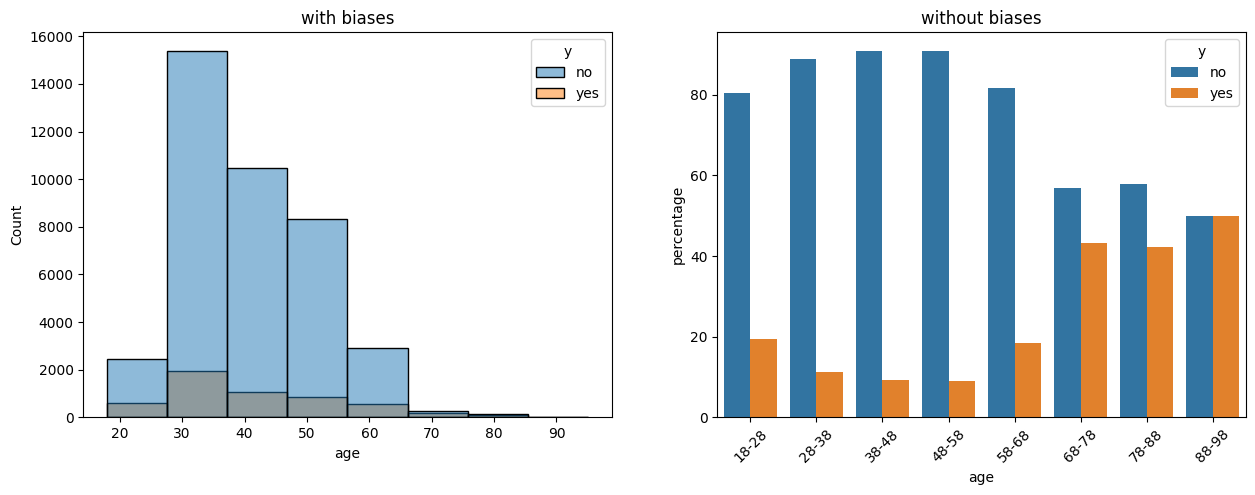

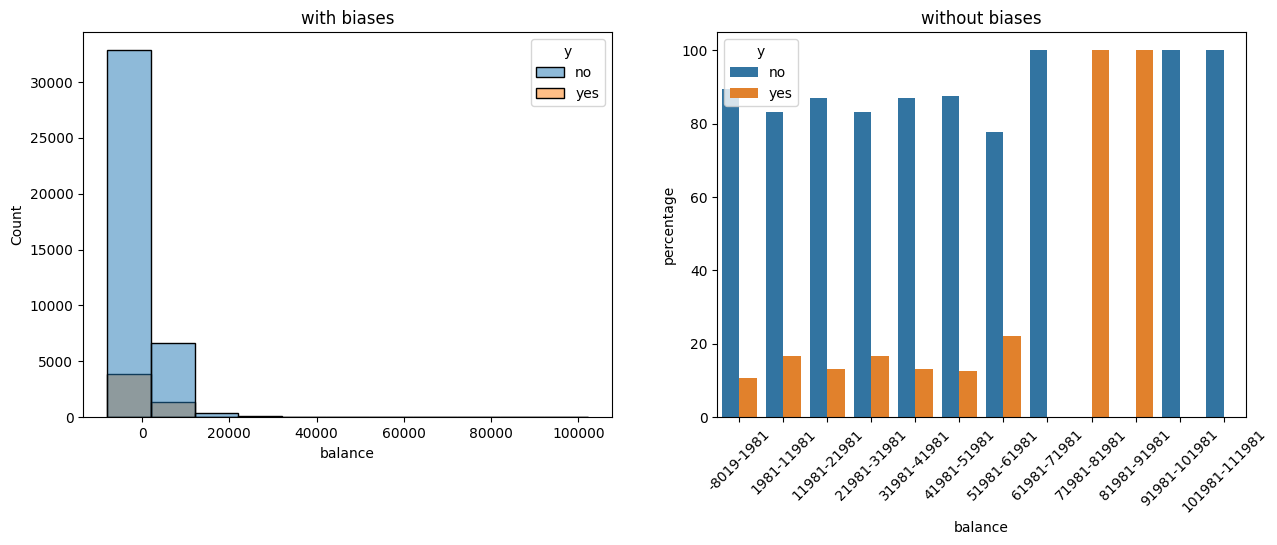

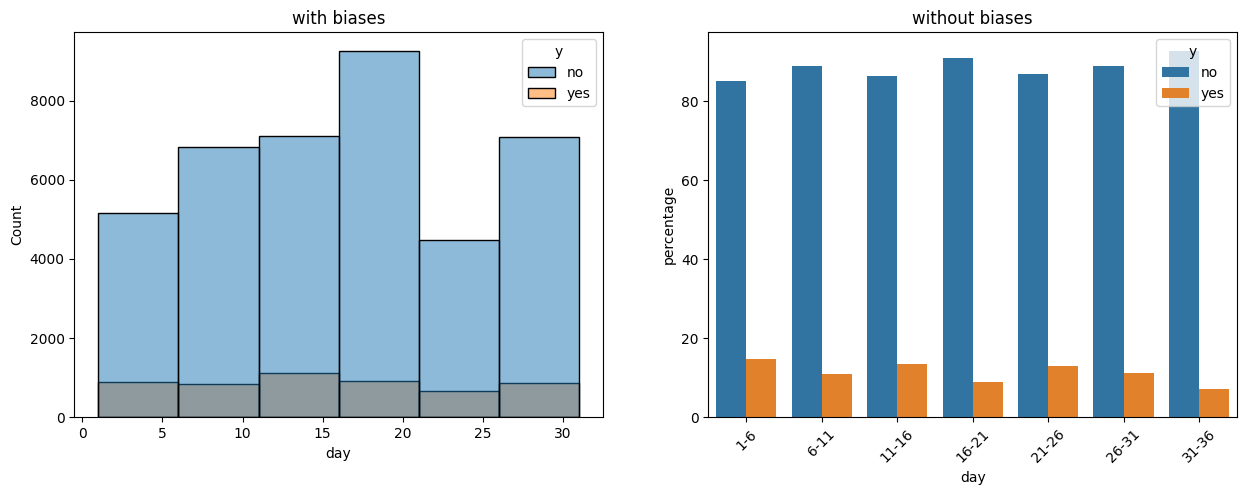

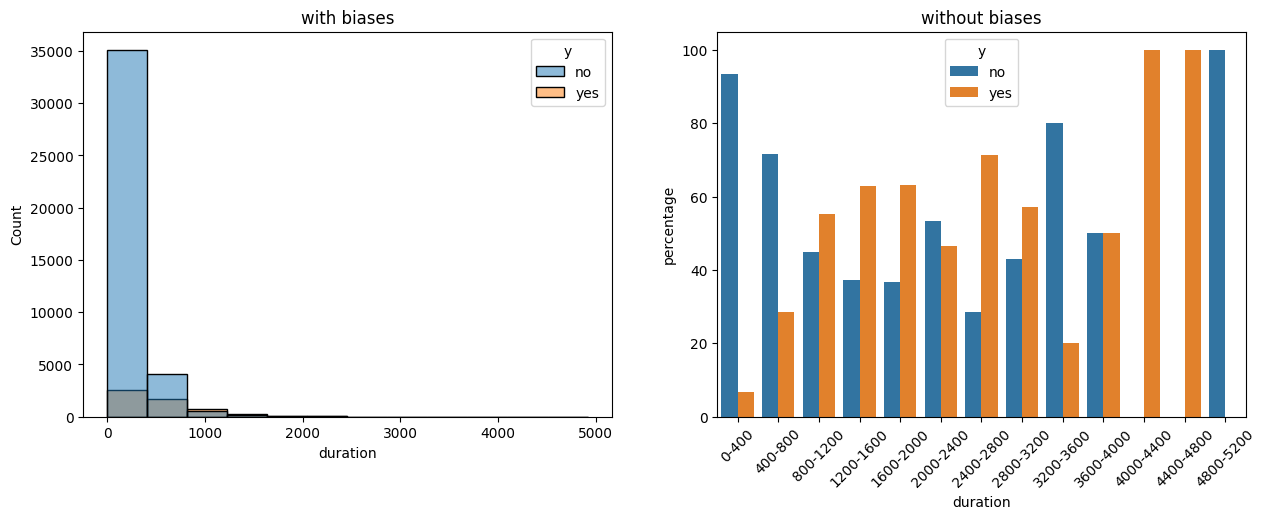

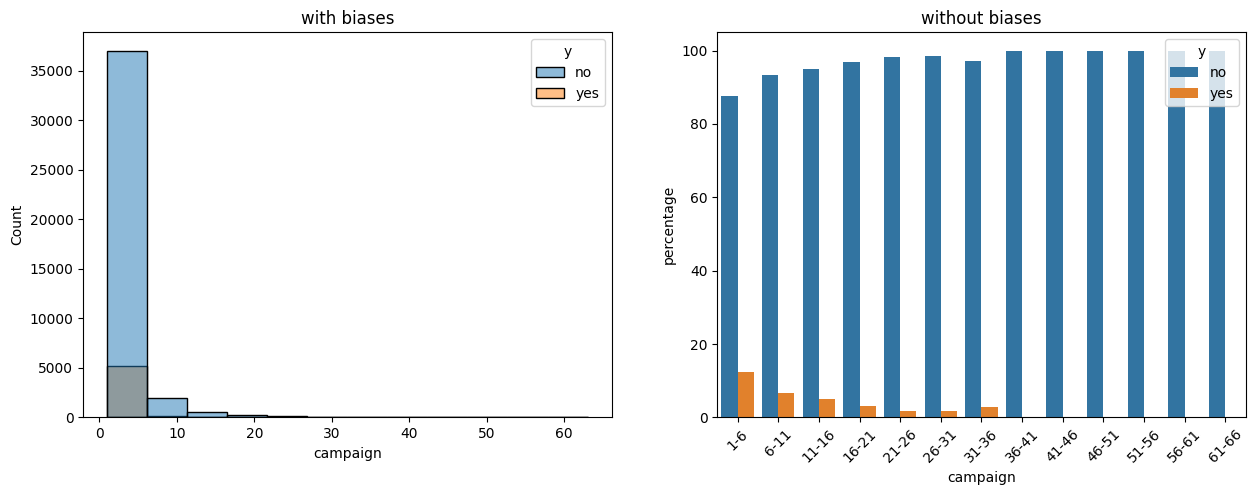

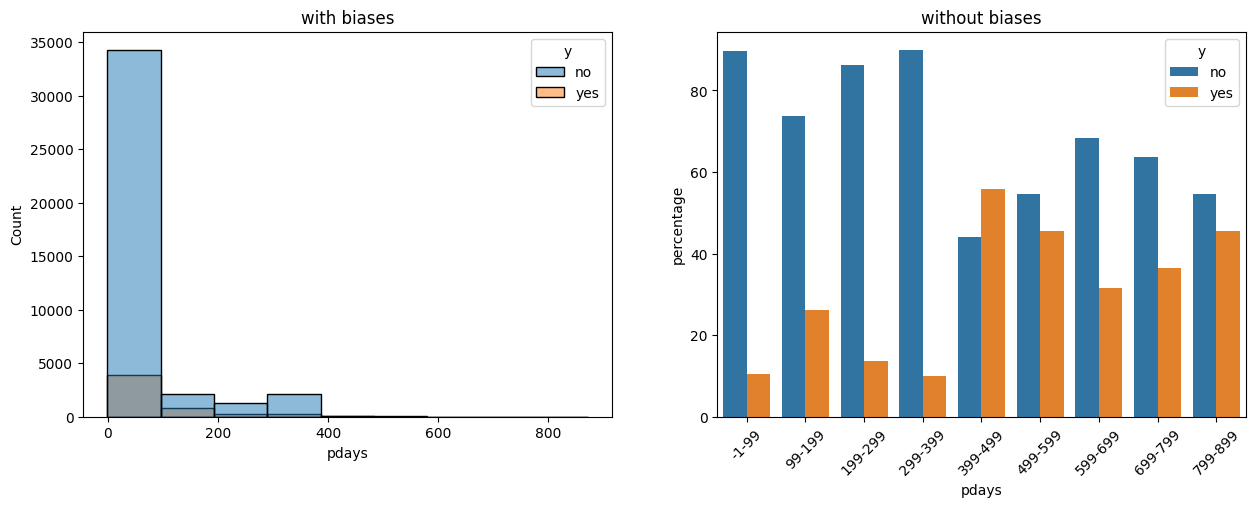

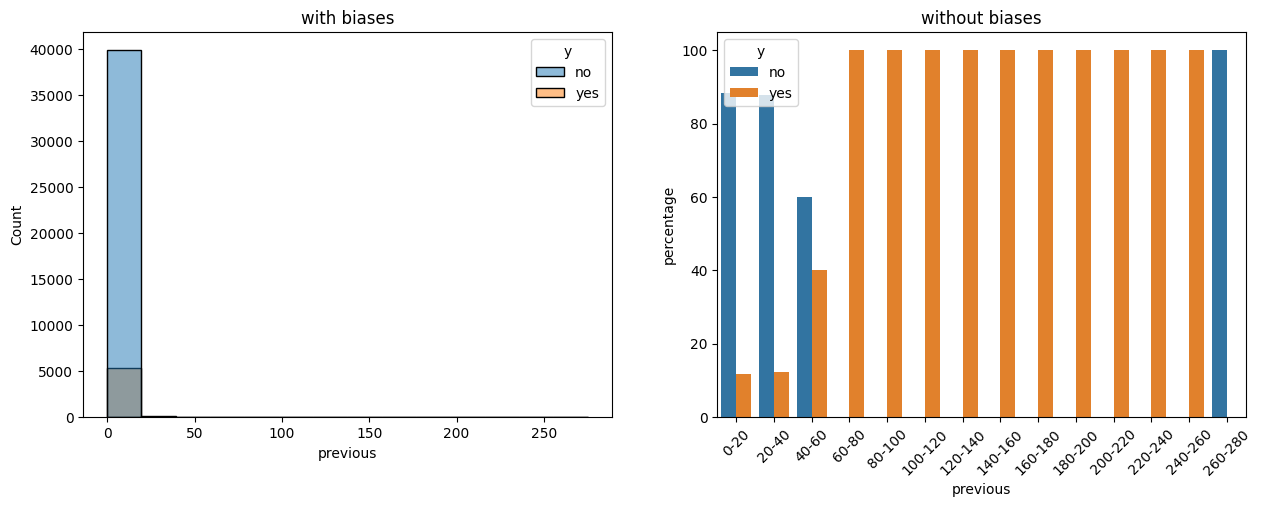

In [16]:
plot_numerical_data_without_biases_in_sampling(train_df,"age","y",10)
plot_numerical_data_without_biases_in_sampling(train_df,"balance","y",10000)
plot_numerical_data_without_biases_in_sampling(train_df,"day","y",5)
plot_numerical_data_without_biases_in_sampling(train_df,"duration","y",400)
plot_numerical_data_without_biases_in_sampling(train_df,"campaign","y",5)
plot_numerical_data_without_biases_in_sampling(train_df,"pdays","y",100)
plot_numerical_data_without_biases_in_sampling(train_df,"previous","y",20)

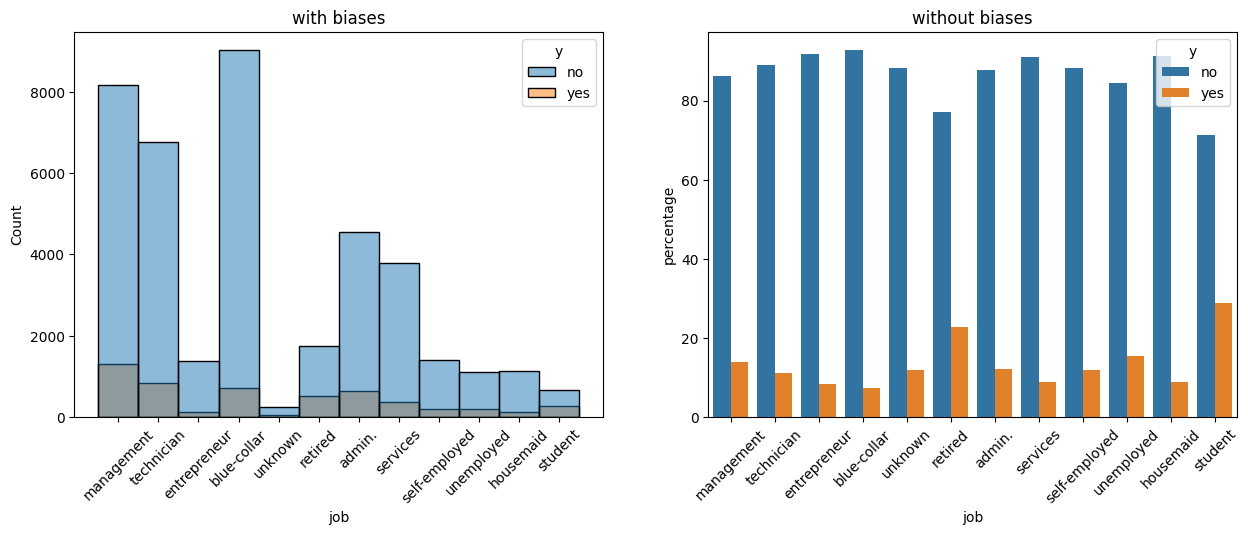

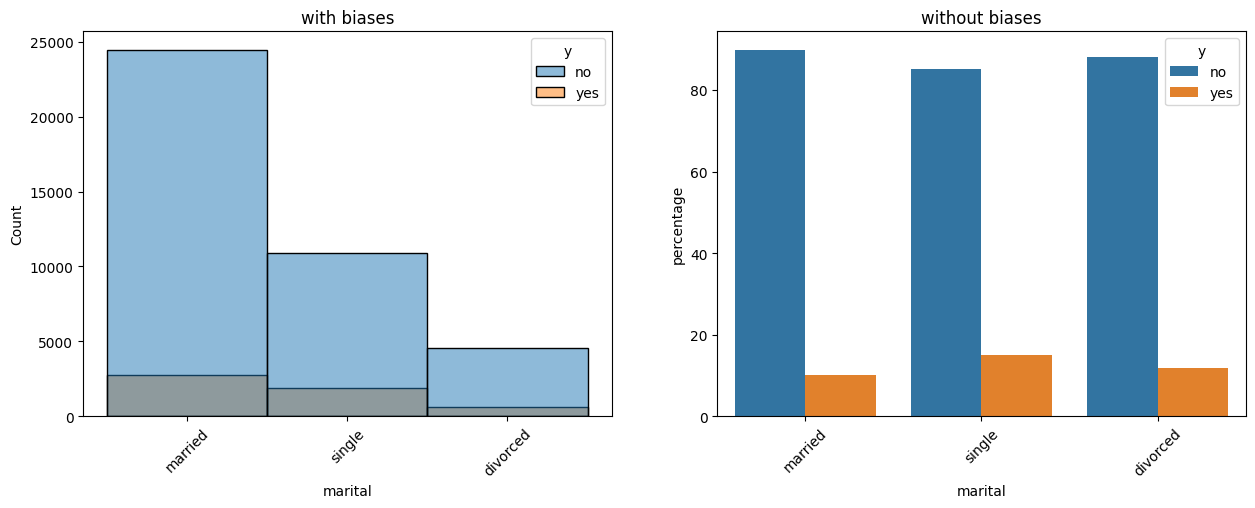

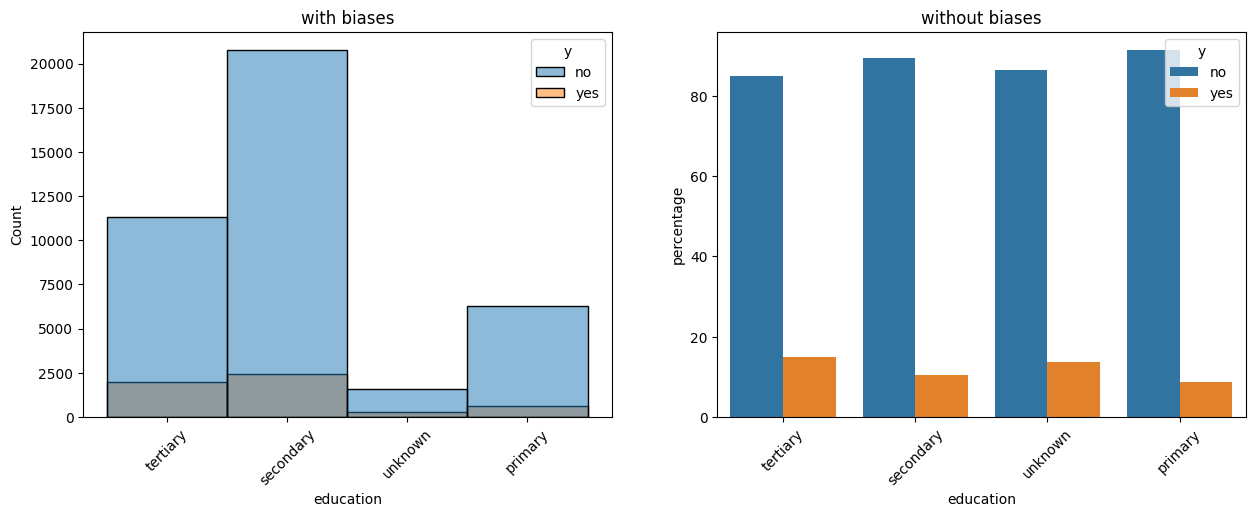

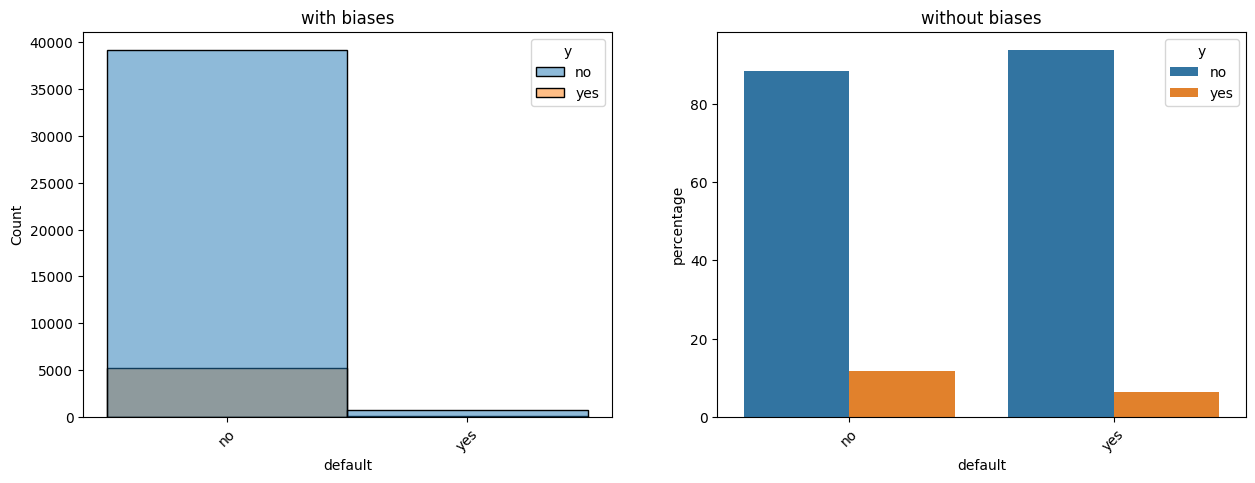

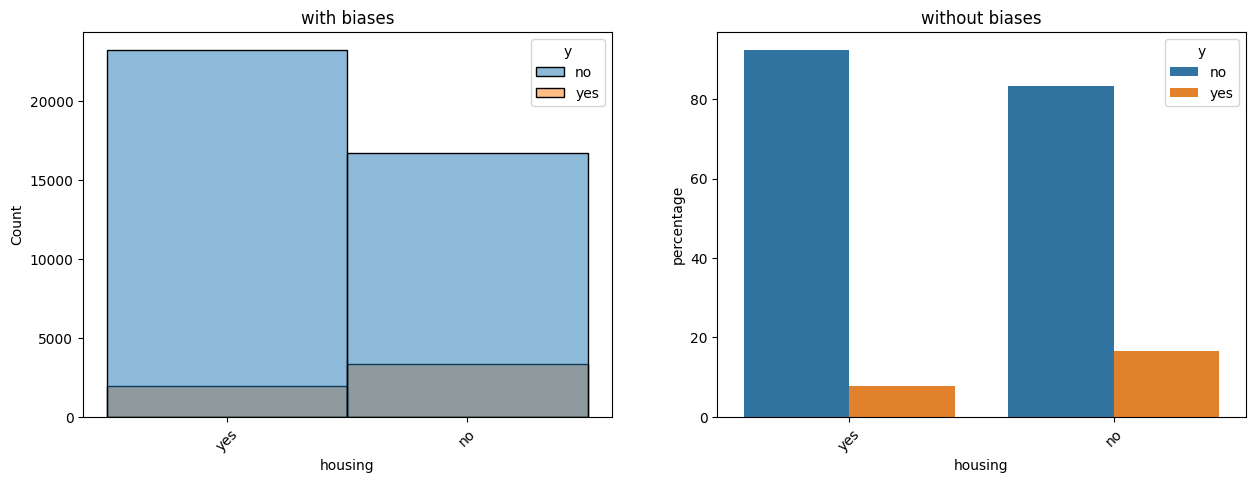

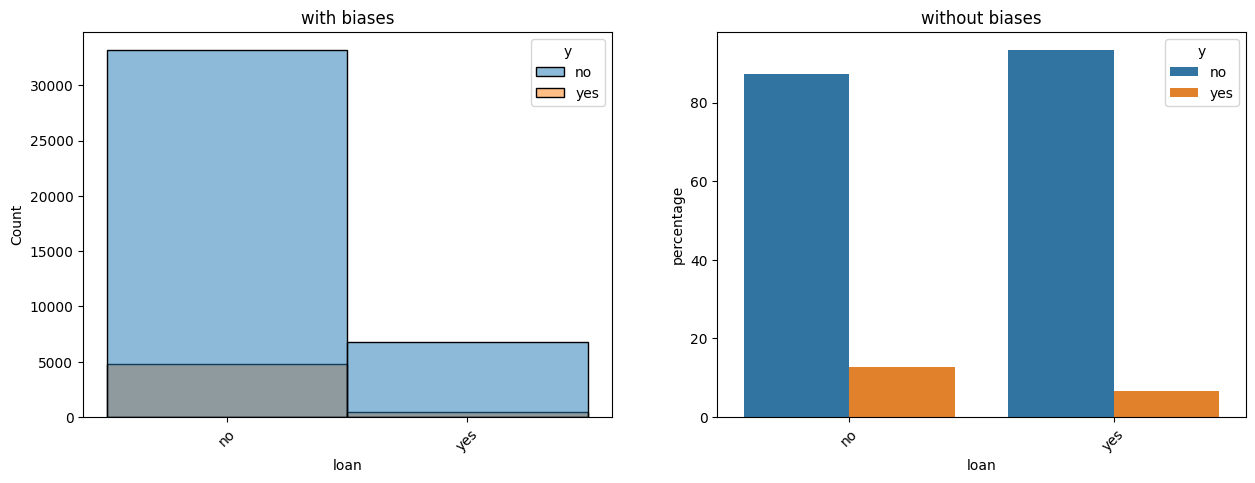

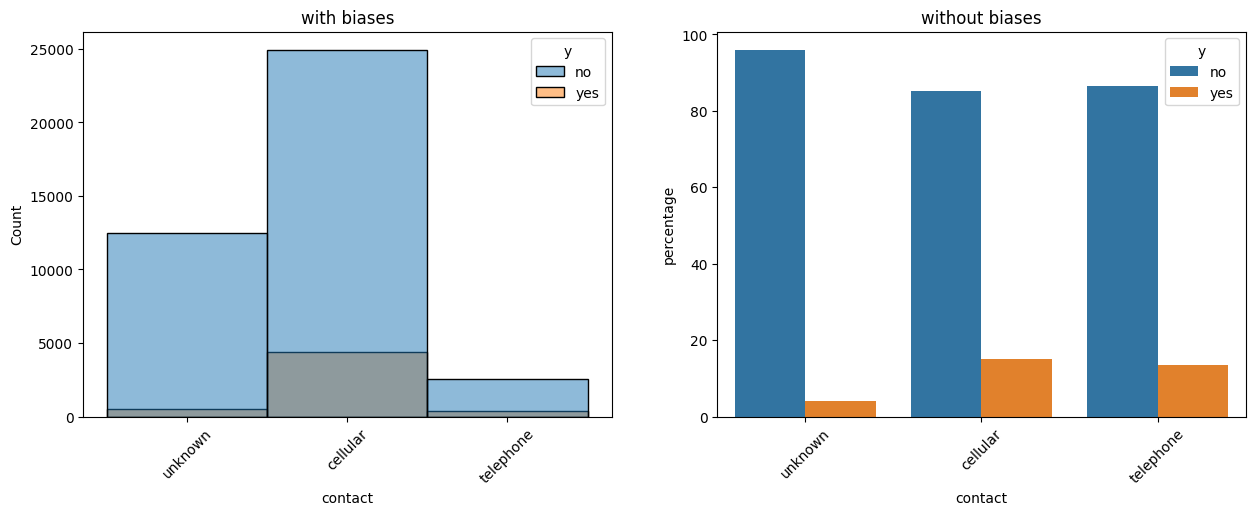

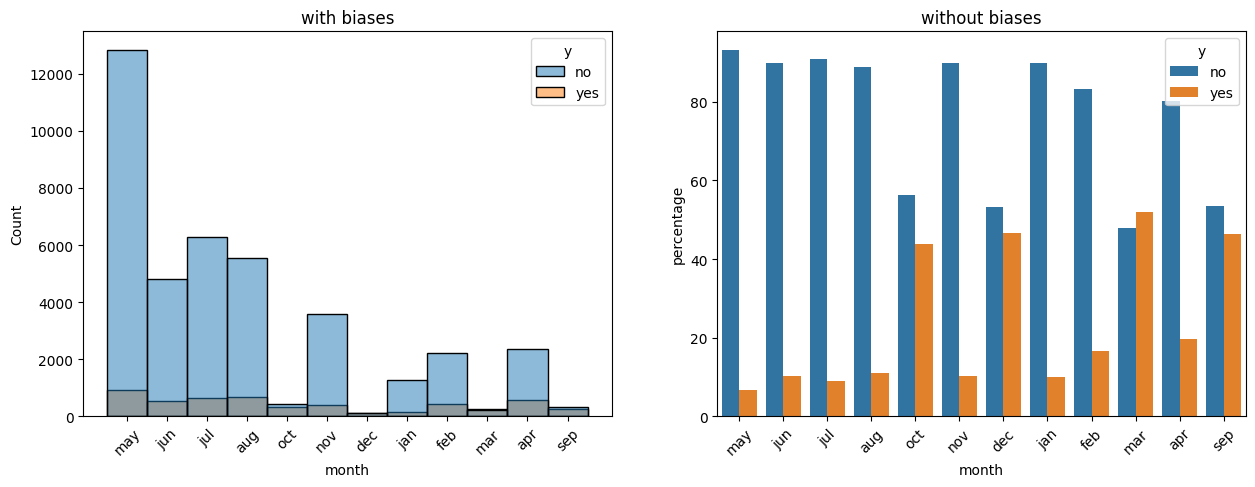

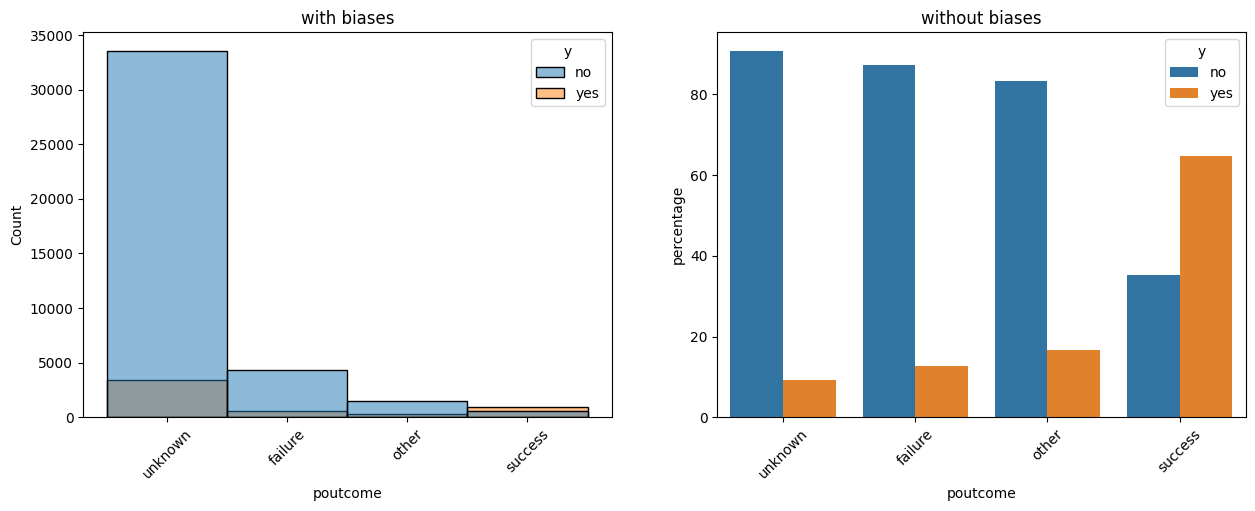

In [17]:
categorical_columns = train_df.select_dtypes('object').columns

for column in categorical_columns:
    if column!="y":
        plot_categorical_data_without_biases_in_sampling(train_df,column,"y")

<Axes: >

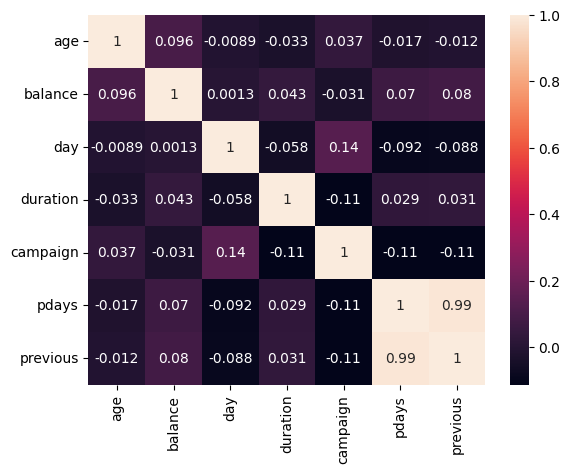

In [18]:
numerical_columns = train_df.select_dtypes('int').columns

sns.heatmap(train_df[numerical_columns].corr(method='spearman'),annot=True)

In [19]:
'''
reference : https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7

'''

from itertools import product

categorical_columns_list1 = train_df.select_dtypes('object').columns
categorical_columns_list2 = train_df.select_dtypes('object').columns

## Creating all possible combinations between the above two variables list
cartessian_product = list(product(categorical_columns_list1,
                                  categorical_columns_list2,
                                  repeat=1))

In [20]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test

import scipy.stats as ss

results = []

for product in cartessian_product:
    if product[0]!=product[1]:
        crosstab_data = pd.crosstab(train_df[product[0]],
                                    train_df[product[1]])
        
        contigency_data = ss.chi2_contingency(crosstab_data)
    
        results.append((product[0], 
                        product[1],
                        list(contigency_data)[1]))
    
results

[('job', 'marital', 0.0),
 ('job', 'education', 0.0),
 ('job', 'default', 8.008039925006771e-09),
 ('job', 'housing', 0.0),
 ('job', 'loan', 5.937325371287369e-103),
 ('job', 'contact', 0.0),
 ('job', 'month', 0.0),
 ('job', 'poutcome', 6.111395961351244e-97),
 ('job', 'y', 3.337121944935502e-172),
 ('marital', 'job', 0.0),
 ('marital', 'education', 8.207753883983455e-286),
 ('marital', 'default', 0.00023411624184748917),
 ('marital', 'housing', 6.29978462961484e-05),
 ('marital', 'loan', 3.298704544931424e-27),
 ('marital', 'contact', 1.114551217950752e-38),
 ('marital', 'month', 3.248892169171113e-86),
 ('marital', 'poutcome', 1.9031201638997894e-14),
 ('marital', 'y', 2.1450999986791792e-43),
 ('education', 'job', 0.0),
 ('education', 'marital', 8.207753883983455e-286),
 ('education', 'default', 0.00963816230590845),
 ('education', 'housing', 3.078476194956886e-139),
 ('education', 'loan', 7.330789568454938e-63),
 ('education', 'contact', 1.9996873521073533e-291),
 ('education', 'mo

In [37]:
chi_test_output = pd.DataFrame(results, 
                               columns = ['var1', 'var2', 'coeff'])

## Using pivot function to convert the above DataFrame into a crosstab
output = chi_test_output.pivot(index='var1', columns='var2', values='coeff')


<Axes: xlabel='var2', ylabel='var1'>

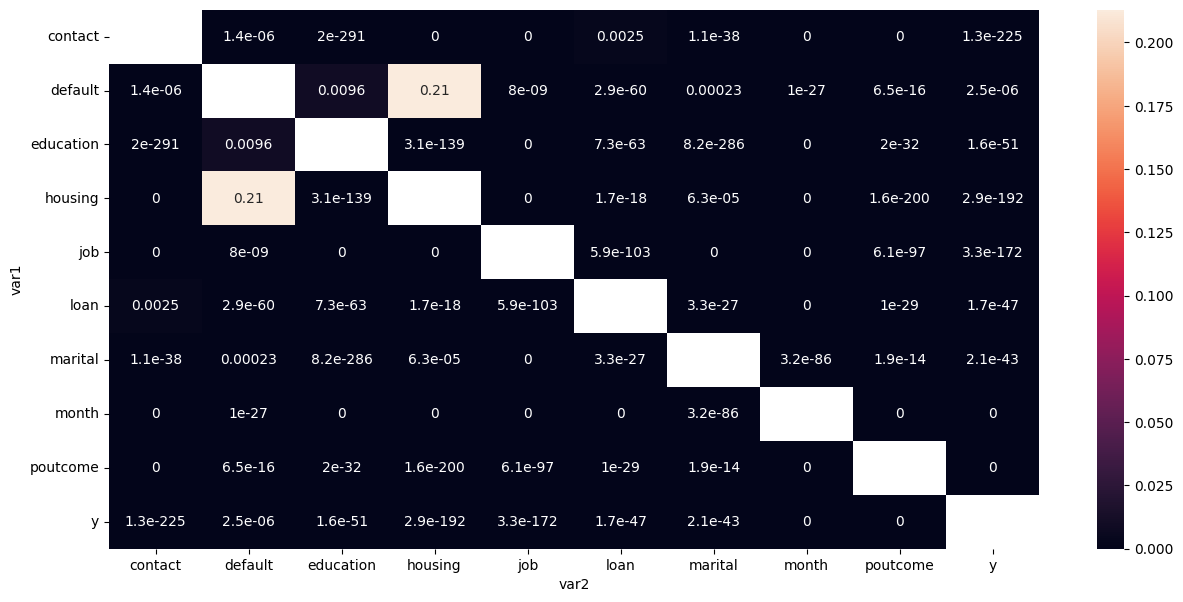

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(output,annot=True)

In [26]:
from scipy.stats import kruskal

numerical_cols = []
catergorical_cols = []
p_value = []

for num_cols in numerical_columns:
    for cat_cols in categorical_columns:
        temp_data = train_df[[num_cols, cat_cols]]
        # Group the data by the categorical variable
        grouped_data = [group[num_cols].values for name, group in temp_data.groupby(cat_cols)]
        # Perform the Kruskal-Wallis H test
        statistic, p = kruskal(*grouped_data)

        numerical_cols.append(num_cols)
        catergorical_cols.append(cat_cols)
        p_value.append(p)

nums_cat_cols_corr_p_value = pd.DataFrame(data={"numeric":numerical_cols, 
                   "categorical":catergorical_cols, 
                   "p_value":p_value})

In [27]:
nums_cat_cols_corr_p_value.head()

,numeric,categorical,p_value
0,age,job,0.000000e+00
1,age,marital,0.000000e+00
2,age,education,0.000000e+00
3,age,default,1.798915e-03
4,age,housing,3.390580e-236


In [29]:
nums_cat_corr_pivot= nums_cat_cols_corr_p_value.pivot(index = 'numeric',
                                 columns='categorical',
                                 values='p_value')

<Axes: xlabel='categorical', ylabel='numeric'>

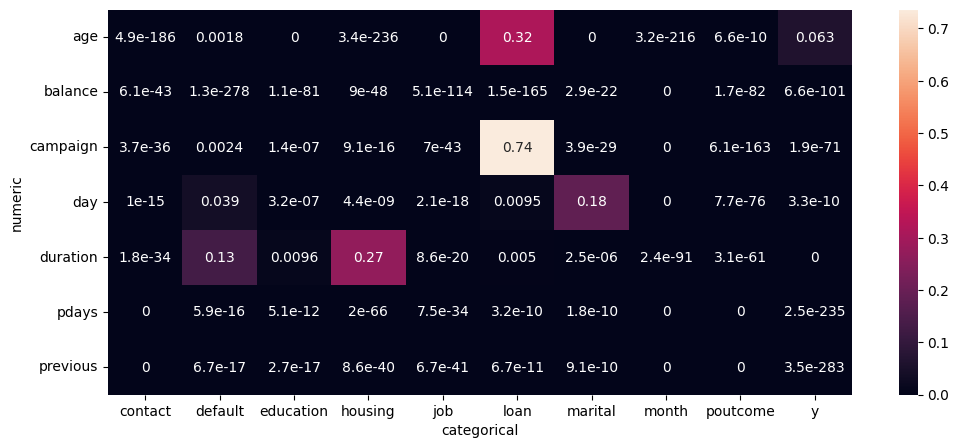

In [35]:
plt.figure(figsize=(12,5))
sns.heatmap(nums_cat_corr_pivot,annot=True)

In [52]:
from scipy.stats import spearmanr

corr = []
p_value = []
numerical_cols = []
categorical_cols = []

for nums_cols in numerical_columns:
    correlation, p = spearmanr(train_df[nums_cols], train_df['education'])
    corr.append(correlation)
    p_value.append(p)
    numerical_cols.append(nums_cols)
    categorical_cols.append("Education")

pd.DataFrame(data = {
    'numerical_cols':numerical_cols,
    'categorical_cols':categorical_cols,
    'corr':corr,
    'p_value':p_value,
})

,numerical_cols,categorical_cols,corr,p_value
0,age,Education,-0.115575,3.122264e-134
1,balance,Education,0.075328,6.801877e-58
2,day,Education,0.024587,1.708703e-07
3,duration,Education,-0.003701,4.312879e-01
4,campaign,Education,-0.001645,7.265724e-01
5,pdays,Education,0.026293,2.252637e-08
6,previous,Education,0.034730,1.505560e-13
